<h2>Maryland House Sale Predicting</h2>

<h3>Introduction</h3>
<p>The following is a machine learning and neural network project on predicting house sales around my hometown of Bowie, MD. The house data consists of house features and houses that were sold in the past 2 years from 2017 to present which were scraped off of Zillow. 
<p>Zillow obtains sale data from state tax records, which are all public, and this is used for our viewing. By scraping this information, we can use machine learning and neural networks to predict future sales of houses.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import seaborn as sns
import time
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor
from sklearn                 import metrics as metrics

import tensorflow as tf
from tensorflow.keras.models    import Sequential
from tensorflow.keras.layers    import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras           import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("md_house_data.csv")
df.head()

,ids,Heating,Cooling,Basement,Flooring1,Flooring2,Architecture,ConstructMat1,ConstructMat2,RoofMat,...,ExteriorMat2,Address,StreetName,Region,Zipcode,YearBuilt,PriceSqft,SalePrice,ListingURL,DateSold
0,0,Forced air,Central,Partially finished,Carpet,Laminate,Colonial,No Data,No Data,Composition,...,Shingle,"11926 Frost Dr, Bowie, MD 20720",Frost Dr,Bowie,MD 20720,1988,167,415000,https://www.zillow.com/homedetails/11926-Frost...,19-Dec
1,1,Other,Central,Partially finished,Carpet,Hardwood,Other,Brick,Brick,Shake/Shingle,...,Brick,"12333 Quarterback Ct, Bowie, MD 20720",Quarterback Ct,Bowie,MD 20720,1995,233,365000,https://www.zillow.com/homedetails/12333-Quart...,19-Dec
2,2,Heat pump,Central,Partially finished,Carpet,Wood Floors,Colonial,Other,Other,Shake/Shingle,...,Other,"12733 Hillmeade Station Dr, Bowie, MD 20720",Hillmeade Station Dr,Bowie,MD 20720,1988,165,370000,https://www.zillow.com/homedetails/12733-Hillm...,19-Dec
3,3,Forced air,Central,Partially finished,Carpet,Hardwood,Colonial,No Data,No Data,Other,...,Other,"7900 Driscoll Dr, Bowie, MD 20720",Driscoll Dr,Bowie,MD 20720,1995,131,375077,https://www.zillow.com/homedetails/7900-Drisco...,19-Dec
4,4,Baseboard,No Data,Partially finished,Carpet,Linoleum / Vinyl,Raised Ranch/Rambler,Other,Other,Shake/Shingle,...,Metal,"8513 Zug Rd, Bowie, MD 20720",Zug Rd,Bowie,MD 20720,1981,215,325000,https://www.zillow.com/homedetails/8513-Zug-Rd...,19-Dec


In [3]:
float_cols = ("TotalLivArea", "PriceSqft", "Stories", "YearBuilt", "LotSize")
int_cols   = ("Bathrooms", "Bedrooms", "FullBaths", "HalfBaths", "SalePrice")

for fcol in float_cols:
    df[fcol] = df[fcol].astype("float32")

for icol in int_cols:
     df[icol] = df[icol].astype("int32")
df.dtypes

ids                int64
Heating           object
Cooling           object
Basement          object
Flooring1         object
Flooring2         object
Architecture      object
ConstructMat1     object
ConstructMat2     object
RoofMat           object
LotSize          float32
HomeType          object
TotalLivArea     float32
Bathrooms          int32
Bedrooms           int32
FullBaths          int32
HalfBaths          int32
Stories          float32
ExteriorFeat      object
ExteriorMat1      object
ExteriorMat2      object
Address           object
StreetName        object
Region            object
Zipcode           object
YearBuilt        float32
PriceSqft        float32
SalePrice          int32
ListingURL        object
DateSold          object
dtype: object

(11.0, 0.0)

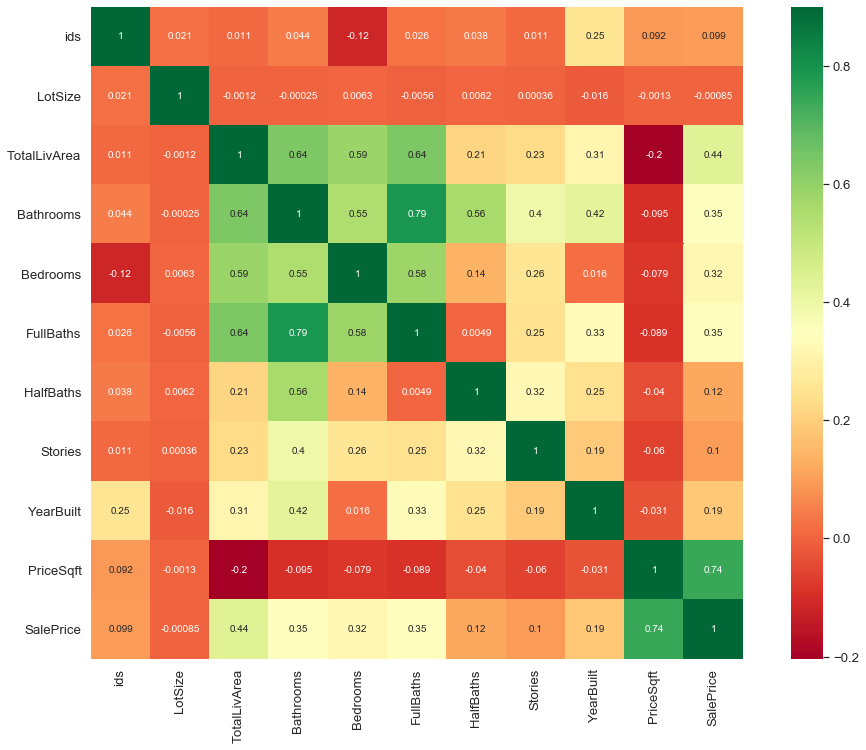

In [4]:
plt.figure(figsize=(17, 12))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), cbar=True, square=True, vmax=.9, annot_kws={'size': 10}, annot=True, cmap="RdYlGn")

# Fix a bug on the recent version of matplotlib where the bottom and top edges 
# of the seaborn heatmaps are cutoff, creating ugly edges.
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

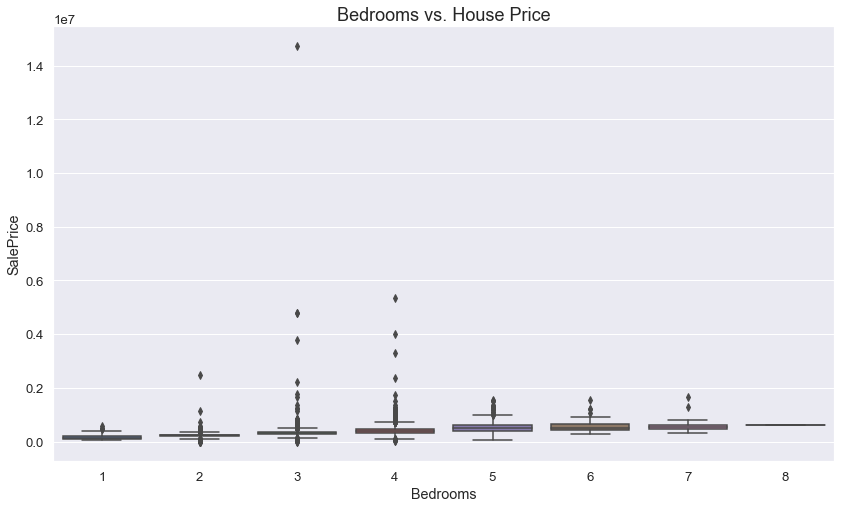

In [5]:
plt.figure(figsize=(14, 8))
plt.title("Bedrooms vs. House Price", fontsize=18)
sns.boxplot(x=df["Bedrooms"], y=df["SalePrice"])

In [6]:
df[df["SalePrice"] > 1500000]

,ids,Heating,Cooling,Basement,Flooring1,Flooring2,Architecture,ConstructMat1,ConstructMat2,RoofMat,...,ExteriorMat2,Address,StreetName,Region,Zipcode,YearBuilt,PriceSqft,SalePrice,ListingURL,DateSold
805,805,Other,Central,None,No Data,No Data,No Data,No Data,No Data,Shake/Shingle,...,Other,"12011 Long Ridge Ln, Bowie, MD 20715",Long Ridge Ln,Bowie,MD 20715,1962.0,1667.0,4000000,https://www.zillow.com/homedetails/12011-Long-...,17-Oct
1089,1089,Forced air,Central,None,Carpet,Laminate,Colonial,No Data,No Data,Shake/Shingle,...,Brick,"2725 Kenhill Dr, Bowie, MD 20715",Kenhill Dr,Bowie,MD 20715,1963.0,1763.0,3299900,https://www.zillow.com/homedetails/2725-Kenhil...,17-Jun
3570,3570,Heat pump,Central,Partially finished,Hardwood,Hardwood,Craftsman,Other,Wood Siding,Shake/Shingle,...,Wood,"2874 Patuxent River Rd, Davidsonville, MD 21035",Patuxent River Rd,Davidsonville,MD 21035,1938.0,992.0,1750000,https://www.zillow.com/homedetails/2874-Patuxe...,19-Sep
3656,3656,Baseboard,Central,Finished basement,Hardwood,Laminate,Colonial,Brick,Brick,Shake/Shingle,...,Brick,"2508 Howard Grove Rd, Davidsonville, MD 21035",Howard Grove Rd,Davidsonville,MD 21035,2003.0,161.0,1530000,https://www.zillow.com/homedetails/2508-Howard...,18-Aug
4266,4266,Forced air,No Data,Finished basement,No Data,No Data,Traditional,Stone,Vinyl Siding,No Data,...,Stone,"1302 Hawk Hollow Dr, Crofton, MD 21114",Hawk Hollow Dr,Crofton,MD 21114,2019.0,870.0,2204950,https://www.zillow.com/homedetails/1302-Hawk-H...,19-Oct
4415,4415,Forced air,Central,None,Hardwood,Hardwood,Craftsman,Brick,Brick Front,No Data,...,No Data,"1306 Iron Oak Cv, Crofton, MD 21114",Iron Oak Cv,Crofton,MD 21114,2019.0,6348.0,14728000,https://www.zillow.com/homedetails/1306-Iron-O...,18-Jul
4815,4815,Forced air,Central,Finished basement,No Data,No Data,Colonial,No Data,No Data,Shake/Shingle,...,Vinyl,"2206 Montauk Dr, Crofton, MD 21114",Montauk Dr,Crofton,MD 21114,2000.0,3815.0,5333000,https://www.zillow.com/homedetails/2206-Montau...,17-Jun
4847,4847,Heat pump,Central,Partially finished,Wood Floors,Wood Floors,Federal,Stone,Brick,Metal,...,Brick,"1002 Saint Helena Is, Crownsville, MD 21032",Saint Helena Is,Crownsville,MD 21032,1929.0,387.0,2370000,https://www.zillow.com/homedetails/1002-Saint-...,19-Dec
5079,5079,Heat pump,Central,Finished basement,Hardwood,Hardwood,Other,No Data,No Data,Other,...,Stone,"1231 Algonquin Rd, Crownsville, MD 21032",Algonquin Rd,Crownsville,MD 21032,2004.0,185.0,1650000,https://www.zillow.com/homedetails/1231-Algonq...,18-Apr
5128,5128,Forced air,Central,Finished basement,No Data,No Data,Colonial,No Data,No Data,Other,...,Other,"1225 Francis Scott Key Ln, Crownsville, MD 21032",Francis Scott Key Ln,Crownsville,MD 21032,1995.0,171.0,1525000,https://www.zillow.com/homedetails/1225-Franci...,17-Nov


<p>Compared to all other houses, houses above \$1.5 million seems out of place, maybe someone paid significantly above asking price because they really want that house far above other buyers. We'll remove those houses to avoid outliers.
<p>Contrary, there are also houses that are into the 4 figures, below \$10,000, some as low as \$2,000. This could possibly be rental prices mistaken as buying prices in the public records. We'll remove these houses too to avoid outliers

In [7]:
df.drop(["Address", "ListingURL"], axis=1, inplace=True)

df = df.drop(df[df["SalePrice"] > 1500000].index).reset_index(drop=True)
df = df.drop(df[df["SalePrice"] < 10000].index).reset_index(drop=True)

In [8]:
bowie = df[df["Region"] == "Bowie"]
bowie

,ids,Heating,Cooling,Basement,Flooring1,Flooring2,Architecture,ConstructMat1,ConstructMat2,RoofMat,...,ExteriorFeat,ExteriorMat1,ExteriorMat2,StreetName,Region,Zipcode,YearBuilt,PriceSqft,SalePrice,DateSold
0,0,Forced air,Central,Partially finished,Carpet,Laminate,Colonial,No Data,No Data,Composition,...,Patio,Metal,Shingle,Frost Dr,Bowie,MD 20720,1988.0,167.0,415000,19-Dec
1,1,Other,Central,Partially finished,Carpet,Hardwood,Other,Brick,Brick,Shake/Shingle,...,Patio,Brick,Brick,Quarterback Ct,Bowie,MD 20720,1995.0,233.0,365000,19-Dec
2,2,Heat pump,Central,Partially finished,Carpet,Wood Floors,Colonial,Other,Other,Shake/Shingle,...,Patio,Other,Other,Hillmeade Station Dr,Bowie,MD 20720,1988.0,165.0,370000,19-Dec
3,3,Forced air,Central,Partially finished,Carpet,Hardwood,Colonial,No Data,No Data,Other,...,None,Other,Other,Driscoll Dr,Bowie,MD 20720,1995.0,131.0,375077,19-Dec
4,4,Baseboard,No Data,Partially finished,Carpet,Linoleum / Vinyl,Raised Ranch/Rambler,Other,Other,Shake/Shingle,...,Patio,Cement concrete,Metal,Zug Rd,Bowie,MD 20720,1981.0,215.0,325000,19-Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,3018,Other,Central,Partially finished,No Data,No Data,Colonial,No Data,No Data,Shake/Shingle,...,Patio,Brick,Brick,Wetherbourne Ct,Bowie,MD 20721,1993.0,157.0,370000,17-Mar
3017,3019,Other,Central,Partially finished,No Data,No Data,Colonial,No Data,No Data,Shake/Shingle,...,Patio,Brick,Brick,Beecham Ct,Bowie,MD 20721,1994.0,203.0,300000,17-Mar
3019,3021,Other,None,Partially finished,No Data,No Data,No Data,No Data,No Data,Shake/Shingle,...,Patio,Brick,Brick,Evening Star Pl,Bowie,MD 20721,1992.0,180.0,240000,17-Mar
3869,3873,Forced air,Central,Partially finished,Hardwood,Hardwood,Colonial,No Data,No Data,Other,...,None,Brick,Brick,Annapolis Rd,Bowie,MD 20720,1957.0,124.0,450000,18-Jun


In [9]:
print("Mean Sale Price for houses sold in Bowie:")
print("             *------------*")
print("             | ${:5.2f} |".format(bowie["SalePrice"].mean()))
print("             *------------*")

Mean Sale Price for houses sold in Bowie:
             *------------*
             | $352107.12 |
             *------------*


Now, another series of boxplots to see bedrooms and bathrooms comparison vs. house prices.

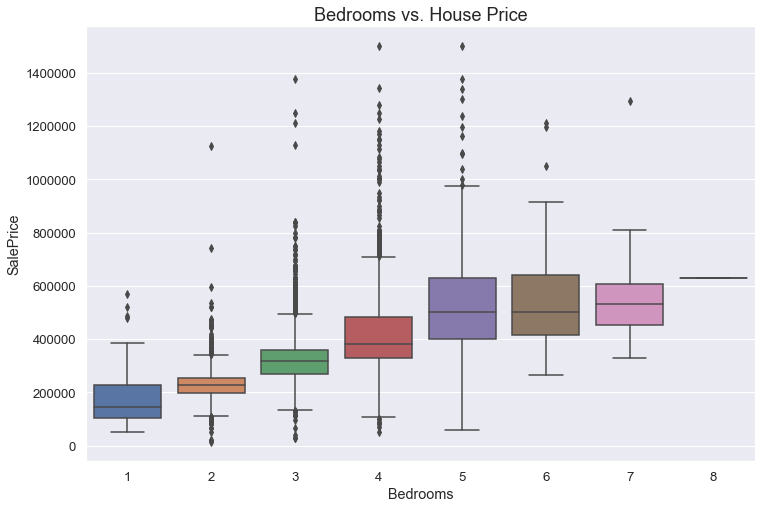

In [10]:
plt.figure(figsize=(12, 8))
plt.title("Bedrooms vs. House Price", fontsize=18)
sns.boxplot(x=df["Bedrooms"], y=df["SalePrice"])

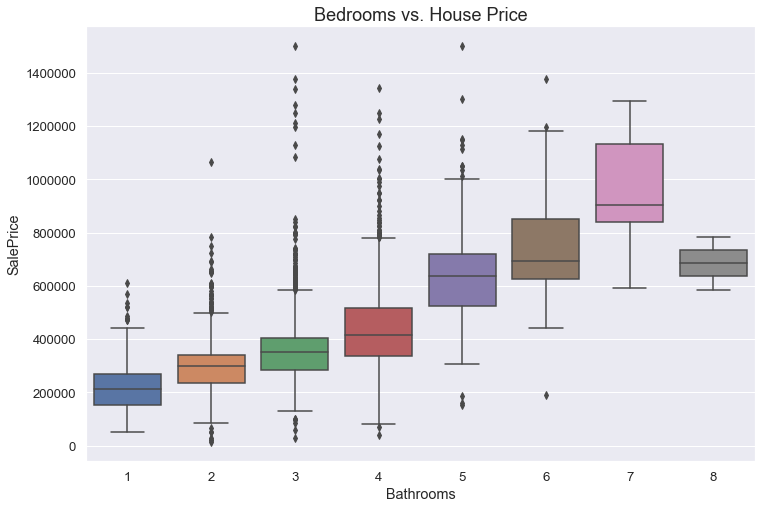

In [11]:
plt.figure(figsize=(12, 8))
plt.title("Bedrooms vs. House Price", fontsize=18)
sns.boxplot(x=df["Bathrooms"], y=df["SalePrice"])

Text(0, 0.5, 'House Price')

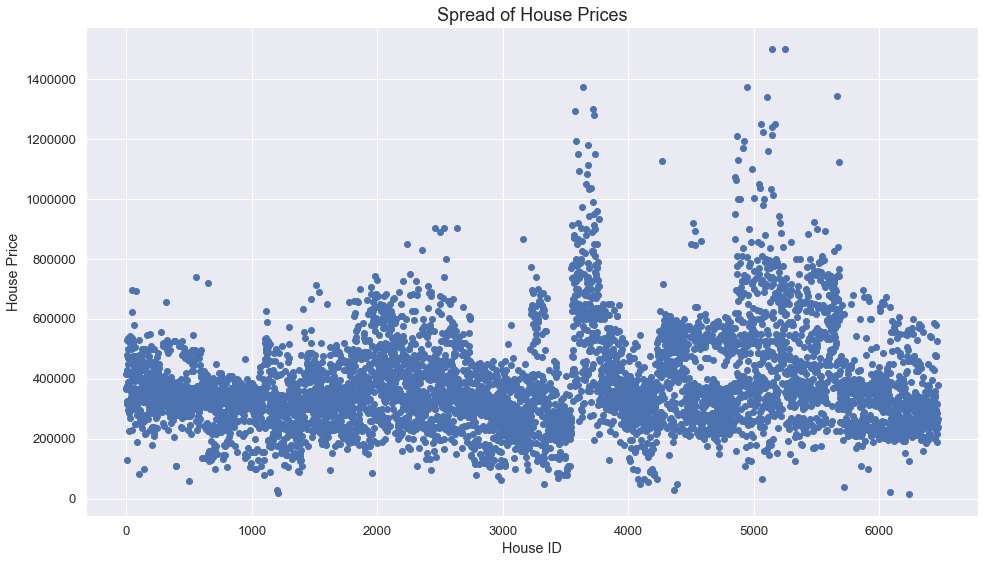

In [12]:
plt.figure(figsize=(16, 9))
plt.title("Spread of House Prices", fontsize=18)
plt.scatter(x=df["ids"], y=df["SalePrice"])
plt.xlabel("House ID")
plt.ylabel("House Price")

Important to know that there isn't supposed to be any intention for correlation between ID and House Price. This is meant to visualize all the house prices in the dataset.

<h3>Further preprocessing of data.</h3>

In [13]:
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(list(df[c].values))

In [14]:
X = df.drop(["ids", "SalePrice"], axis=1)
y = df["SalePrice"]

# Normalize the dataset to make calculations easier.
# Use normalization when the dataset consists of a large range of numbers.
X = (X - X.mean())/X.std()
X.head()

,Heating,Cooling,Basement,Flooring1,Flooring2,Architecture,ConstructMat1,ConstructMat2,RoofMat,LotSize,...,Stories,ExteriorFeat,ExteriorMat1,ExteriorMat2,StreetName,Region,Zipcode,YearBuilt,PriceSqft,DateSold
0,-0.606620,-0.315041,0.93876,-1.387336,-0.627413,-0.632422,0.247091,0.199919,-1.457845,-0.012146,...,-1.996536,0.311925,-0.331013,0.179948,-0.629071,-0.727254,-0.715887,0.082393,-0.193037,0.654792
1,2.267479,-0.315041,0.93876,-1.387336,-0.945294,1.150649,-1.631200,-1.783175,0.624097,-0.013429,...,1.034776,0.311925,-1.175273,-1.564851,0.729364,-0.727254,-0.715887,0.470688,1.118886,0.654792
2,1.117839,-0.315041,0.93876,-1.387336,2.869276,-0.632422,0.357578,0.310091,0.624097,-0.012870,...,1.034776,0.311925,0.231827,-0.110852,-0.412098,-0.727254,-0.715887,0.082393,-0.232792,0.654792
3,-0.606620,-0.315041,0.93876,-1.387336,-0.945294,-0.632422,0.247091,0.199919,0.103612,-0.012574,...,1.034776,-1.969025,0.231827,-0.110852,-0.941951,-0.727254,-0.715887,0.470688,-0.908631,0.654792
4,-1.756260,2.443175,0.93876,-1.387336,0.008348,1.373533,0.357578,0.310091,0.624097,-0.012936,...,0.024338,0.311925,-0.893853,-0.692451,1.691589,-0.727254,-0.715887,-0.305901,0.761088,0.654792


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (5148, 26)
X_test shape:  (1287, 26)
y_train shape: (5148,)
y_test shape:  (1287,)


Begin the algorithmic testing of the dataset. For each model, the data will be fitted to the model, an accuracy percentage will be given and an error will be tested. All of this will be displayed for each model and 

<h2><font color="red"> Linear Regression</h2>

In [16]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train)

y_linear_pred = linear_reg.predict(X_test)

linear_acc = linear_reg.score(X_test, y_test)
print("Intercept:     {:5.2f}".format(linear_reg.intercept_))
print("Coefficient Mean: {:5.2f}".format(linear_reg.coef_.mean()))
print("Accuracy:     {:5.7f}".format(linear_acc))

# print("\ny = {:5.2f}x + {:5.2f}".format(linear_reg.coef_.mean(), linear_reg.intercept_))

Intercept:     377345.68
Coefficient Mean: 9724.63
Accuracy:     0.8548775


In [17]:
linear_df = pd.DataFrame({"Actual": y_test, "Predicted": y_linear_pred})
linear_df.head()

,Actual,Predicted
2436,437000,478962.574323
3361,230000,205815.035728
233,332000,463967.662793
3667,1085000,725526.004297
5011,736125,727994.388794


Text(0, 0.5, 'House Price [$]')

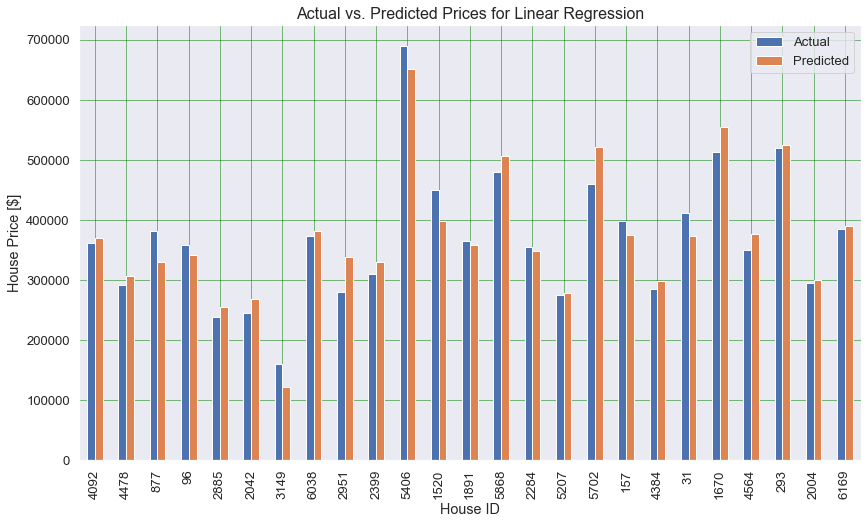

In [18]:
# Plot these predicted test values for 25 of them.
# Example inspired by 
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

df1 = linear_df.sample(25)
df1.plot(kind="bar", figsize=(14, 8))
plt.legend()
plt.grid(which="major", linestyle="-", linewidth=0.5, color="green")
plt.grid(which="minor", linestyle=":", linewidth=0.5, color="blue")
plt.title("Actual vs. Predicted Prices for Linear Regression", fontsize=16)
plt.xlabel("House ID")
plt.ylabel("House Price [$]")

In [19]:
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_linear_pred)) )
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_linear_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_linear_pred))) )

Mean Absolute Error:     $36689.13
Mean Squared Error:      $3307326540.58
Root Mean Squared Error: $57509.36


<h2><font color="red"> Random Forest Regressor</h2>

In [20]:
rf_params = {"min_samples_split": [4, 8, 12, 16], "n_estimators": [25, 75, 100]}

rf = RandomForestRegressor()
rf_grids = GridSearchCV(rf, rf_params)
rf_grids.fit(X_train, y_train)
print(rf_grids.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


Using GridSearchCV(), we can find the best hyperparameters for the model by going through all the given combinations in the parameters. 

In [21]:
rf_reg = RandomForestRegressor(min_samples_split=4, min_samples_leaf=1, n_estimators=100, n_jobs=-1, random_state=42)
rf_reg.fit(X_train, y_train)

y_rf_pred = rf_reg.predict(X_test)
rf_acc = rf_reg.score(X_test, y_test)
print("Accuracy: {:5.7f}".format(rf_acc))

Accuracy: 0.9816778


Determine the most important features in the Random Forest Regressor

In [22]:
# Get feature_importances of rf for all features
rf_features = []
for name, score in zip(X, rf_reg.feature_importances_):
    rf_features.append([score, name])
    
rf_features = sorted(rf_features, reverse=True)
for scores in rf_features:
    print("{:.7f} - {} ".format(scores[0], scores[1]))

0.6254473 - TotalLivArea 
0.2464543 - PriceSqft 
0.0626052 - Zipcode 
0.0285027 - LotSize 
0.0130545 - Bathrooms 
0.0109643 - YearBuilt 
0.0023148 - FullBaths 
0.0014701 - StreetName 
0.0012879 - Architecture 
0.0011868 - DateSold 
0.0007174 - ExteriorMat1 
0.0006759 - Bedrooms 
0.0005290 - RoofMat 
0.0005213 - Flooring1 
0.0004662 - ConstructMat2 
0.0004575 - Region 
0.0004367 - ExteriorMat2 
0.0004248 - Flooring2 
0.0004055 - Stories 
0.0003823 - ConstructMat1 
0.0003768 - ExteriorFeat 
0.0003571 - HomeType 
0.0002707 - HalfBaths 
0.0002566 - Basement 
0.0002564 - Heating 
0.0001780 - Cooling 


In [23]:
rf_df = pd.DataFrame({"Actual": y_test, "Predicted": y_rf_pred})
rf_df.head()

,Actual,Predicted
2436,437000,4.303531e+05
3361,230000,2.297322e+05
233,332000,3.323221e+05
3667,1085000,1.034590e+06
5011,736125,7.473340e+05


Text(0, 0.5, 'House Price [$]')

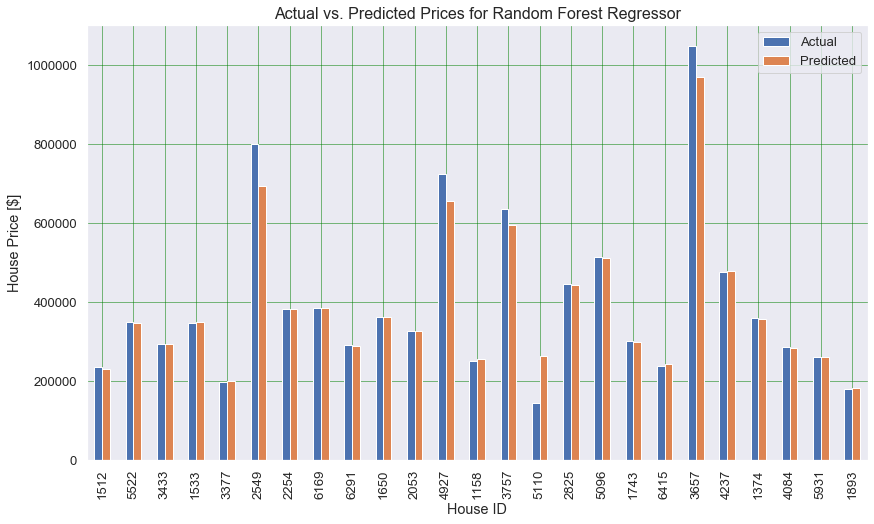

In [24]:
df2 = rf_df.sample(25)
df2.plot(kind="bar", figsize=(14, 8))
plt.legend()
plt.grid(which="major", linestyle="-", linewidth=0.5, color="green")
plt.grid(which="minor", linestyle=":", linewidth=0.5, color="blue")
plt.title("Actual vs. Predicted Prices for Random Forest Regressor", fontsize=16)
plt.xlabel("House ID")
plt.ylabel("House Price [$]")

In [25]:
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_rf_pred) ))
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_rf_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_rf_pred))))

Mean Absolute Error:     $6710.27
Mean Squared Error:      $417561795.27
Root Mean Squared Error: $20434.33


<h2><font color="red"> Gradient Boost Regressor</h2>

In [26]:
gb_params = {"learning_rate": [0.001, 0.01, 0.1], "n_estimators": [25, 50, 75, 100], 
             "min_samples_split": [2, 4, 8], "random_state": [42]}

gb = GradientBoostingRegressor()
gb_grids = GridSearchCV(gb, gb_params)
gb_grids.fit(X_train, y_train)
print(gb_grids.best_estimator_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=8,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [27]:
gb_reg = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=8, random_state=42)
gb_reg.fit(X_train, y_train)

y_gb_pred = gb_reg.predict(X_test)
gb_acc = gb_reg.score(X_test, y_test)
print("Accuracy: {:5.7f}".format(gb_acc))

Accuracy: 0.9867241


Similar to the Random Forest Regressor, get the most important features for the Gradient Boost Regressor.

In [28]:
# Get feature_importances of rf for all features
gb_features = []
for name, score in zip(X, gb_reg.feature_importances_):
    gb_features.append([score, name])
    
gb_features = sorted(gb_features, reverse=True)
for scores in gb_features:
    print("{:.7f} - {} ".format(scores[0], scores[1]))

0.6502229 - TotalLivArea 
0.2628660 - PriceSqft 
0.0368713 - LotSize 
0.0298855 - Zipcode 
0.0101820 - YearBuilt 
0.0077985 - Bathrooms 
0.0014327 - FullBaths 
0.0002303 - Bedrooms 
0.0002200 - Architecture 
0.0001241 - ExteriorFeat 
0.0001066 - Basement 
0.0000261 - Region 
0.0000201 - Flooring2 
0.0000128 - StreetName 
0.0000011 - DateSold 
0.0000000 - Stories 
0.0000000 - RoofMat 
0.0000000 - HomeType 
0.0000000 - Heating 
0.0000000 - HalfBaths 
0.0000000 - Flooring1 
0.0000000 - ExteriorMat2 
0.0000000 - ExteriorMat1 
0.0000000 - Cooling 
0.0000000 - ConstructMat2 
0.0000000 - ConstructMat1 


In [29]:
gb_df = pd.DataFrame({"Actual": y_test, "Predicted": y_gb_pred})
gb_df.head()

,Actual,Predicted
2436,437000,4.182131e+05
3361,230000,2.194298e+05
233,332000,3.371906e+05
3667,1085000,1.023640e+06
5011,736125,7.360376e+05


Text(0, 0.5, 'House Price [$]')

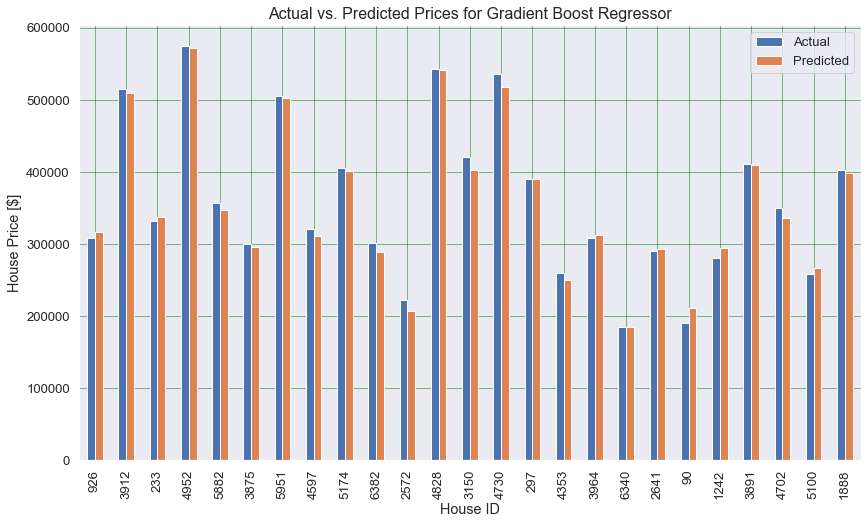

In [30]:
df3 = gb_df.sample(25)
df3.plot(kind="bar", figsize=(14, 8))
plt.legend()
plt.grid(which="major", linestyle="-", linewidth=0.5, color="green")
plt.grid(which="minor", linestyle=":", linewidth=0.5, color="blue")
plt.title("Actual vs. Predicted Prices for Gradient Boost Regressor", fontsize=16)
plt.xlabel("House ID")
plt.ylabel("House Price [$]")

In [31]:
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_gb_pred) ))
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_gb_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_gb_pred))))

Mean Absolute Error:     $10824.18
Mean Squared Error:      $302555476.93
Root Mean Squared Error: $17394.12


<h2><font color="red"> Neural Network</h2>

In [32]:
def build_model():
    model = Sequential()

    # Input layer
    model.add(Dense(64, kernel_regularizer=regularizers.l2(0.060), input_shape=[X_train.shape[1]]))
    model.add(Activation("elu"))

    # Hidden Layer 1
    model.add(Dense(256, kernel_regularizer=regularizers.l2(0.060)))
    model.add(Activation("elu"))
    model.add(Dropout(0.15))

    # Hidden Layer 2
    model.add(Dense(128, kernel_regularizer=regularizers.l2(0.060)))
    model.add(Activation("elu"))
    model.add(Dropout(0.15))

    # Hidden Layer 3
    model.add(Dense(64, kernel_regularizer=regularizers.l2(0.060)))
    model.add(Activation("elu"))
    model.add(Dropout(0.08))

    # Hidden Layer 4
    model.add(Dense(64, kernel_regularizer=regularizers.l2(0.060)))
    model.add(Activation("elu"))
    model.add(Dropout(0.08))
    
    # Hidden Layer 5
    model.add(Dense(128, kernel_regularizer=regularizers.l2(0.060)))
    model.add(Activation("elu"))
    model.add(Dropout(0.15))

    # Output layer
    model.add(Dense(1))
    
    # optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.88)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])    
    
    return model    

In [33]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1728      
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0

In [34]:
EPOCHS = 400

# es = EarlyStopping(monitor="val_mae", min_delta=3500, mode="min", patience=25, verbose=1)

last_time = time.time()
model_history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, batch_size=32, verbose=1)#, callbacks=[es])
# model.save("nn_house_model.h5")
print("\nModel took approximately {:5.2f} seconds to train.".format(time.time() - last_time))

Train on 4118 samples, validate on 1030 samples
Epoch 1/400
4118/4118 [==============================] - 2s 371us/sample - loss: 118956382249.5269 - mae: 298150.1562 - mse: 118956367872.0000 - val_loss: 12602101912.1087 - val_mae: 84694.7578 - val_mse: 12602100736.0000
Epoch 2/400
4118/4118 [==============================] - 1s 141us/sample - loss: 10224028545.4298 - mae: 69818.1328 - mse: 10224028672.0000 - val_loss: 6135596694.6175 - val_mae: 54109.5859 - val_mse: 6135597056.0000
Epoch 3/400
4118/4118 [==============================] - 1s 138us/sample - loss: 8249735232.4041 - mae: 61830.5859 - mse: 8249734144.0000 - val_loss: 5386789145.3515 - val_mae: 49250.7578 - val_mse: 5386789376.0000
Epoch 4/400
4118/4118 [==============================] - 1s 138us/sample - loss: 7510126406.7450 - mae: 58214.7344 - mse: 7510125056.0000 - val_loss: 4403632553.5068 - val_mae: 43922.2305 - val_mse: 4403631616.0000
Epoch 5/400
4118/4118 [==============================] - 1s 138us/sample - loss: 66

4118/4118 [==============================] - 1s 141us/sample - loss: 2457259630.0340 - mae: 36240.7969 - mse: 2457259520.0000 - val_loss: 762571503.6583 - val_mae: 16229.5068 - val_mse: 762571328.0000
Epoch 39/400
4118/4118 [==============================] - 1s 143us/sample - loss: 2569054625.6319 - mae: 36244.2148 - mse: 2569054464.0000 - val_loss: 1146545255.1456 - val_mae: 22684.3418 - val_mse: 1146544896.0000
Epoch 40/400
4118/4118 [==============================] - 1s 149us/sample - loss: 2504236404.8723 - mae: 36318.9102 - mse: 2504236032.0000 - val_loss: 1158254571.6194 - val_mae: 23478.7715 - val_mse: 1158254336.0000
Epoch 41/400
4118/4118 [==============================] - 1s 151us/sample - loss: 2522426223.7746 - mae: 36705.4219 - mse: 2522425088.0000 - val_loss: 810980057.7243 - val_mae: 18552.2090 - val_mse: 810979776.0000
Epoch 42/400
4118/4118 [==============================] - 1s 146us/sample - loss: 2499445363.1316 - mae: 35850.7227 - mse: 2499444992.0000 - val_loss: 60

4118/4118 [==============================] - 1s 143us/sample - loss: 2146274396.7518 - mae: 33954.5547 - mse: 2146273408.0000 - val_loss: 750372508.1476 - val_mae: 19126.8496 - val_mse: 750371584.0000
Epoch 77/400
4118/4118 [==============================] - 1s 147us/sample - loss: 2177503285.4628 - mae: 34150.6836 - mse: 2177502208.0000 - val_loss: 629914051.1068 - val_mae: 17522.9434 - val_mse: 629913216.0000
Epoch 78/400
4118/4118 [==============================] - 1s 160us/sample - loss: 2395484024.2292 - mae: 35331.9414 - mse: 2395482880.0000 - val_loss: 446711240.8854 - val_mae: 13434.1406 - val_mse: 446710368.0000
Epoch 79/400
4118/4118 [==============================] - 1s 145us/sample - loss: 2142418535.7552 - mae: 33617.6797 - mse: 2142418048.0000 - val_loss: 482372987.7126 - val_mae: 15213.4141 - val_mse: 482372064.0000
Epoch 80/400
4118/4118 [==============================] - 1s 148us/sample - loss: 2112577408.2487 - mae: 34312.5469 - mse: 2112576768.0000 - val_loss: 404950

4118/4118 [==============================] - 1s 173us/sample - loss: 1680223672.1982 - mae: 30685.0586 - mse: 1680215296.0000 - val_loss: 373985221.4369 - val_mae: 12030.0537 - val_mse: 373977184.0000
Epoch 259/400
4118/4118 [==============================] - 1s 153us/sample - loss: 1689220789.2763 - mae: 30837.0586 - mse: 1689212928.0000 - val_loss: 244988348.0233 - val_mae: 9565.6436 - val_mse: 244980272.0000
Epoch 260/400
4118/4118 [==============================] - 1s 163us/sample - loss: 1668655519.2074 - mae: 30372.0000 - mse: 1668647552.0000 - val_loss: 297759622.4621 - val_mae: 11531.6914 - val_mse: 297751424.0000
Epoch 261/400
4118/4118 [==============================] - 1s 147us/sample - loss: 1741573813.6493 - mae: 31065.6914 - mse: 1741565696.0000 - val_loss: 164512974.1204 - val_mae: 8107.4321 - val_mse: 164504784.0000
Epoch 262/400
4118/4118 [==============================] - 1s 149us/sample - loss: 1596082130.6809 - mae: 30223.3398 - mse: 1596073856.0000 - val_loss: 2277

4118/4118 [==============================] - 1s 147us/sample - loss: 1787930348.8528 - mae: 30949.8086 - mse: 1787920128.0000 - val_loss: 228074573.3282 - val_mae: 9131.6709 - val_mse: 228064240.0000
Epoch 297/400
4118/4118 [==============================] - 1s 150us/sample - loss: 1598048531.2715 - mae: 29850.1289 - mse: 1598038016.0000 - val_loss: 169040252.3029 - val_mae: 9056.1172 - val_mse: 169029872.0000
Epoch 298/400
4118/4118 [==============================] - 1s 148us/sample - loss: 1665711223.2346 - mae: 30461.2793 - mse: 1665700864.0000 - val_loss: 147953901.1417 - val_mae: 7735.8584 - val_mse: 147943440.0000
Epoch 299/400
4118/4118 [==============================] - 1s 148us/sample - loss: 1645655878.3720 - mae: 30306.8887 - mse: 1645645568.0000 - val_loss: 148574888.8621 - val_mae: 8123.1890 - val_mse: 148564368.0000
Epoch 300/400
4118/4118 [==============================] - 1s 149us/sample - loss: 1679008250.9645 - mae: 30122.9492 - mse: 1678997760.0000 - val_loss: 235687

4118/4118 [==============================] - 1s 150us/sample - loss: 1731579915.3764 - mae: 30851.6816 - mse: 1731566848.0000 - val_loss: 184471469.1883 - val_mae: 8824.3799 - val_mse: 184458528.0000
Epoch 335/400
4118/4118 [==============================] - 1s 162us/sample - loss: 1559334852.8179 - mae: 29305.1738 - mse: 1559321856.0000 - val_loss: 200810623.8447 - val_mae: 10028.5947 - val_mse: 200797648.0000
Epoch 336/400
4118/4118 [==============================] - 1s 148us/sample - loss: 1628933007.1374 - mae: 29647.5098 - mse: 1628919680.0000 - val_loss: 253572640.9942 - val_mae: 11120.5791 - val_mse: 253559600.0000
Epoch 337/400
4118/4118 [==============================] - 1s 147us/sample - loss: 1642558259.8465 - mae: 29728.1250 - mse: 1642545280.0000 - val_loss: 183601864.3262 - val_mae: 9022.0869 - val_mse: 183588736.0000
Epoch 338/400
4118/4118 [==============================] - 1s 147us/sample - loss: 1606883393.7717 - mae: 29772.1270 - mse: 1606870016.0000 - val_loss: 1141

4118/4118 [==============================] - 1s 153us/sample - loss: 1687393372.8762 - mae: 30073.0566 - mse: 1687377664.0000 - val_loss: 133783479.3631 - val_mae: 6784.8667 - val_mse: 133767712.0000
Epoch 373/400
4118/4118 [==============================] - 1s 178us/sample - loss: 1567392863.9845 - mae: 29426.3438 - mse: 1567377536.0000 - val_loss: 166767704.1087 - val_mae: 9162.3633 - val_mse: 166751888.0000
Epoch 374/400
4118/4118 [==============================] - 1s 184us/sample - loss: 1655829095.1336 - mae: 29704.6133 - mse: 1655813248.0000 - val_loss: 121923056.3417 - val_mae: 7144.7720 - val_mse: 121907160.0000
Epoch 375/400
4118/4118 [==============================] - 1s 173us/sample - loss: 1619939209.8844 - mae: 29763.4824 - mse: 1619922944.0000 - val_loss: 131992461.9340 - val_mae: 8170.7612 - val_mse: 131976480.0000
Epoch 376/400
4118/4118 [==============================] - 1s 183us/sample - loss: 1609033479.2734 - mae: 29624.1113 - mse: 1609017216.0000 - val_loss: 187631

In [35]:
loss2, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Testing set Mean Abs Error: ${:5.2f}".format(mae))

1287/1287 - 0s - loss: 148425777.3209 - mae: 7259.9019 - mse: 148407808.0000
Testing set Mean Abs Error: $7259.90


In [36]:
hist = pd.DataFrame(model_history.history)
hist['epoch'] = model_history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
395,1.612220e+09,29014.970703,1.612202e+09,2.168248e+08,9186.991211,216807136.0,395
396,1.606796e+09,29303.814453,1.606779e+09,1.379651e+08,7100.470703,137947408.0,396
397,1.589325e+09,29118.667969,1.589307e+09,1.114890e+08,6945.511230,111471208.0,397
398,1.614365e+09,29615.363281,1.614348e+09,1.407165e+08,7482.650391,140698576.0,398
399,1.611271e+09,29228.242188,1.611253e+09,1.018079e+08,6813.977539,101789928.0,399


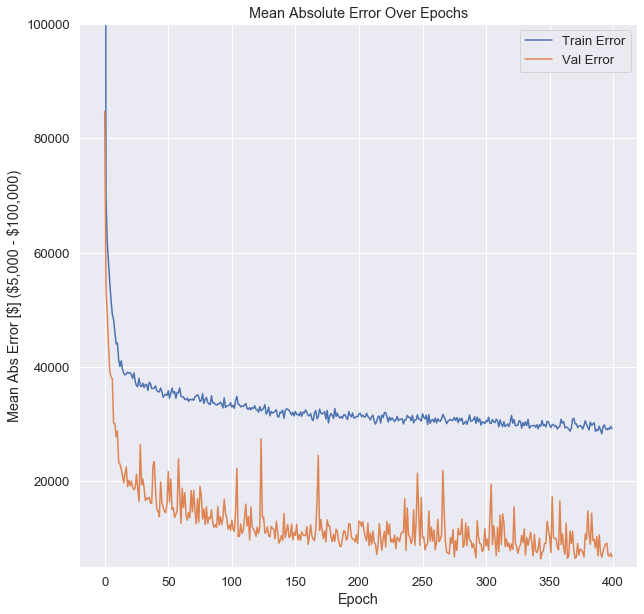

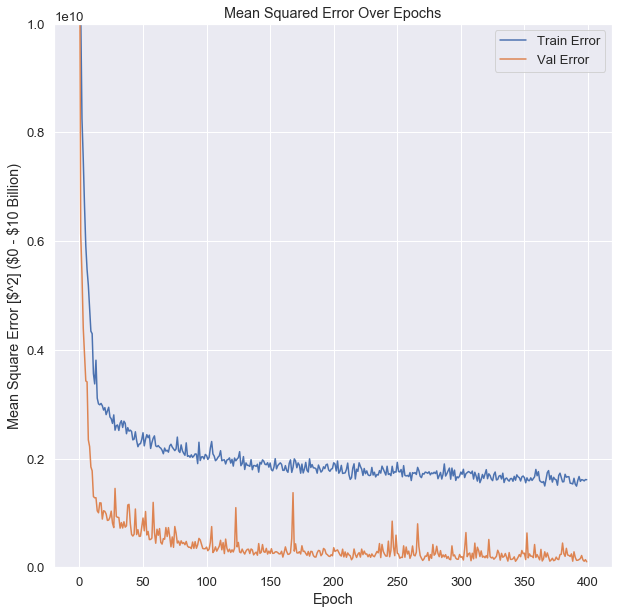

In [37]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(10, 10))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [$] ($5,000 - $100,000)')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.ylim([5000,100000])
    plt.title("Mean Absolute Error Over Epochs")
    plt.legend()

    plt.figure(figsize=(10, 10))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$^2] ($0 - $10 Billion)')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.ylim([0,1e10])
    plt.title("Mean Squared Error Over Epochs")
    plt.legend()
    plt.show()

plot_history(model_history)

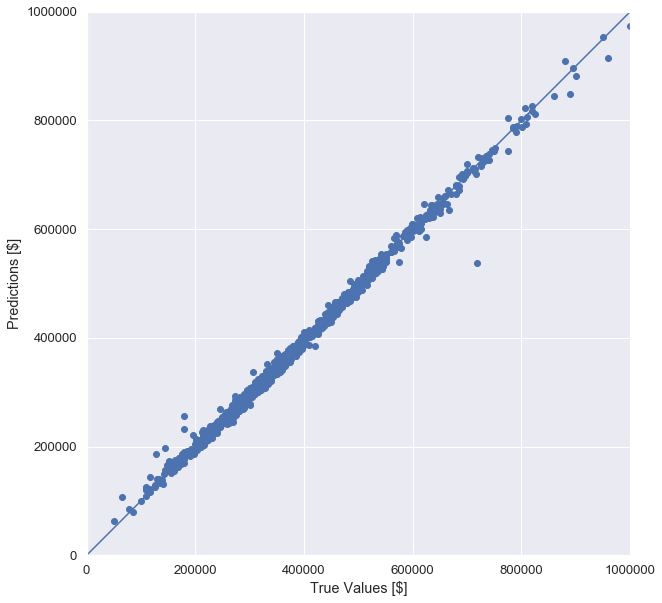

In [38]:
model_preds = model.predict(X_test).flatten()

plt.figure(figsize=(15, 10))
a = plt.axes(aspect='equal')
plt.scatter(y_test, model_preds)
plt.xlabel('True Values [$]')
plt.ylabel('Predictions [$]')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

In [39]:
nn_df = pd.DataFrame({"Actual": y_test, "Predicted": model_preds})
nn_df.head()

,Actual,Predicted
2436,437000,4.289732e+05
3361,230000,2.284110e+05
233,332000,3.212331e+05
3667,1085000,1.068477e+06
5011,736125,7.277355e+05


Text(0, 0.5, 'House Price [$]')

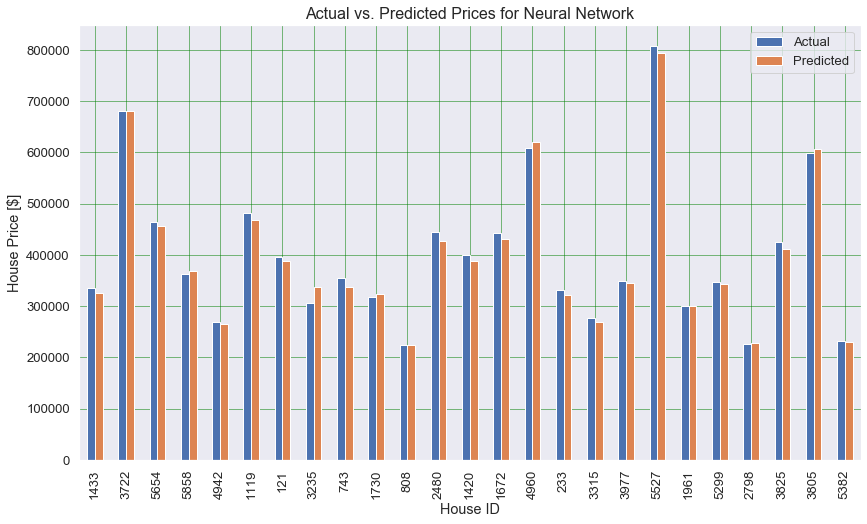

In [40]:
df4 = nn_df.sample(25)
df4.plot(kind="bar", figsize=(14, 8))
plt.legend()
plt.grid(which="major", linestyle="-", linewidth=0.5, color="green")
plt.grid(which="minor", linestyle=":", linewidth=0.5, color="blue")
plt.title("Actual vs. Predicted Prices for Neural Network", fontsize=16)
plt.xlabel("House ID")
plt.ylabel("House Price [$]")

In [41]:
# Complete list of scores, mean absolute error and accuracy:

print("Linear Regression:")
print("Accuracy: {:5.7f}".format(linear_acc))
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_linear_pred)) )
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_linear_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_linear_pred))) )

print("\nRandom Forest Regression:")
print("Accuracy: {:5.7f}".format(rf_acc))
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_rf_pred) ))
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_rf_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_rf_pred))))

print("\nGradient Boosting Regression:")
print("Accuracy: {:5.7f}".format(gb_acc))
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_gb_pred) ))
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_gb_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_gb_pred))))

print("\nNeural Network:")
print("Accuracy: Not applicable")
print("Mean Absolute Error:     ${:5.2f}".format( mae ))
print("Mean Squared Error:      ${:5.2f}".format( mse ))
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(mse)))

Linear Regression:
Accuracy: 0.8548775
Mean Absolute Error:     $36689.13
Mean Squared Error:      $3307326540.58
Root Mean Squared Error: $57509.36

Random Forest Regression:
Accuracy: 0.9816778
Mean Absolute Error:     $6710.27
Mean Squared Error:      $417561795.27
Root Mean Squared Error: $20434.33

Gradient Boosting Regression:
Accuracy: 0.9867241
Mean Absolute Error:     $10824.18
Mean Squared Error:      $302555476.93
Root Mean Squared Error: $17394.12

Neural Network:
Accuracy: Not applicable
Mean Absolute Error:     $7259.90
Mean Squared Error:      $148407808.00
Root Mean Squared Error: $12182.27


<br>
<p>Note: Running a new run of the different models may produce different results than what I got in this particular run.</p>

| Model                        | Accuracy Score | Mean Squared Error  | Mean Absolute Error | Root Mean Squared Error |
|------------------------------|----------------|---------------------|---------------------|-------------------------|
| Linear Regression            | 0.8548775      | \\$3,307,326,540.58 | \\$36,689.13        | \\$57,509.36            |
| Random Forest Regression     | 0.9816778      | \\$417,561,795.27   | \\$6,710.27         | \\$20,434.33            |
| Gradient Boosting Regression | 0.9867241      | \\$302,555,476.93   | \\$10,824.18        | \\$17,394.12            |
| Neural Network               | Not applicable | \\$148,407,808.00   | \\$7259.90          | \\$12,182.27            |

<h2>Conclusion</h2>
<p>The best algorithm tested here is the Gradient Boost Algorithm with over a 98.6% accuracy, just slightly more than the Random Forest Algorithm at 98.1% accuracy. However, these algorithm's biggest flaw is overfitting, and with a such a high accuracy, this should be taken with a grain of salt with the absolute error of below \$10,000 for both of them.
<p>The Neural Network architecture here is the best overall with minimizing \$ error between training and validation and potential for exploding gradients. The network here is susceptible to fluctuate in the validation, so the error can be anywhere as high as \$20,000 and low as \$8,000 for each epoch.
<p>The first model here, the Linear Regression model, it's not that effective with the given data, but can provide a base point for what to expect. An 85% accuracy for Linear Regression is not that bad really.